# Comparison of edge detectors

#### 1. Gradient method
#### 2. FFT method

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### a) I/O Function:

In [2]:
# I/O Function
def io_image(f_name):
    """
    This is an image reading function
    Input:  f_name -> filename path
    Output: im_arr -> image channels as an array
    """
    # Call the PIL reader
    im = Image.open(f_name)

    # Convert to an array
    im_arr = np.array(im)

    # Return statement
    return im_arr

In [3]:
# Paths to the images
f_im_bw = "./clouds_bw.jpg"
f_im_cl = "./clouds.jpg"

# Test call
bw = io_image(f_im_bw)
cl = io_image(f_im_cl)

# Analyse the sizes
print("B/W image shape is: ", bw.shape)
print("C/L image shape is: ", cl.shape)

B/W image shape is:  (311, 453, 3)
C/L image shape is:  (2304, 3072, 3)


### b) Image inspection

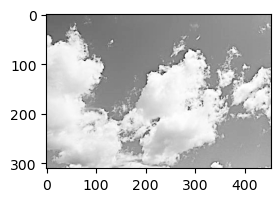

In [4]:
# Image B/W
plt.figure(figsize = (3,2))

plt.imshow(bw[:,:,0], cmap = "Greys_r")

plt.show()

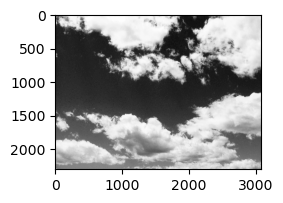

In [5]:
# Image C/L
plt.figure(figsize = (3,2))

plt.imshow(cl[:,:,0], cmap = "Greys_r")

plt.show()

In [20]:
# Pixel Intensity Scale
print("Min B/W: ", np.min(bw[:,:,0]))
print("Max B/W: ", np.max(bw[:,:,0]))

print("Min C/L: ", np.min(cl[:,:,0]))
print("Max C/L: ", np.max(cl[:,:,0]))

Min B/W:  0
Max B/W:  255
Min C/L:  35
Max C/L:  253


## c) Edge detector 1: Derivatives

In [44]:
# Edge detector based on derivatives

def edge_detector1(im_channel):
    """
    Edge detector funtion that uses intensity gradient maps.
    Input:  im_channel -> 1 channel
    Output: grad_mag -> Gradient map
    """
    # Gradient of the image
    grad_ch = np.gradient(im_channel)

    # Magnitude of the  gradient
    grad_mag = np.sqrt(grad_ch[0]**2 + grad_ch[1]**2)

    # Isolate large gradients
    grad_bin = np.where(grad_mag > 10, 1., 0.)
    
    # Return the gradient
    return grad_bin

In [45]:
# Call our edge detector 1
map_1 = edge_detector1(bw[:,:,0])

print(map_1.shape, np.max(map_1), np.min(map_1))

(311, 453) 1.0 0.0


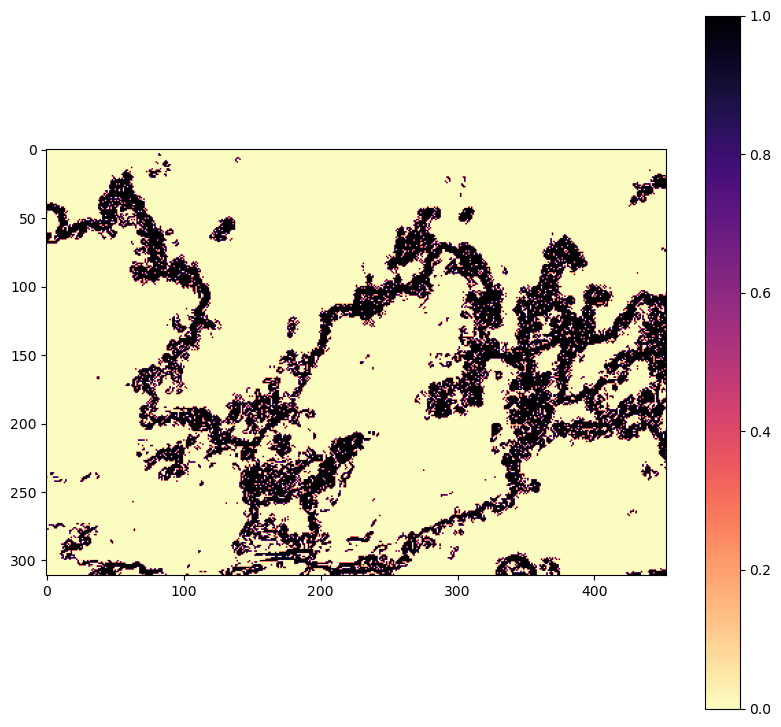

In [46]:
# Image B/W
plt.figure(figsize = (10,9))

z = plt.imshow(map_1, cmap = "magma_r")

plt.colorbar()

plt.show()